In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

gender_df = pd.read_csv('gender_submission.csv')
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

In [40]:
total_servival_df = pd.merge(test_df,gender_df, on='PassengerId', how = 'inner')

In [41]:
# Count the number of passengers in each deck.
embarkian_count = train_df['Embarked'].value_counts()
embarkian_count.head()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [42]:
# Find the proportion of passengers in each class.
class_count = train_df['Pclass'].value_counts()
pclass_pro = class_count /class_count.sum()
print(f'{pclass_pro.round(4)}')

Pclass
3    0.5511
1    0.2424
2    0.2065
Name: count, dtype: float64


C:\Users\M R Mafi\AppData\Local\Temp\ipykernel_13392\692670883.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train_df, x='Embarked', y='Survived', palette='Greens')


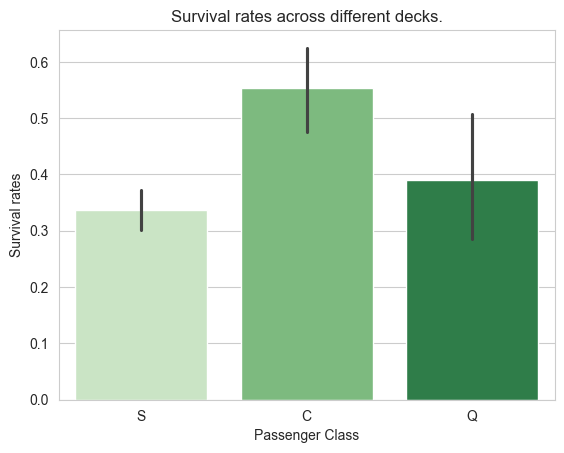

In [43]:
# Plot a bar chart showing survival rates across different decks.
sns.barplot(data=train_df, x='Embarked', y='Survived', palette='Greens')
plt.title('Survival rates across different decks.')
plt.xlabel('Passenger Class')
plt.ylabel('Survival rates')
plt.show()

In [44]:
# Determine the average fare for each embarkation point.
fare_embarkation = (train_df
 .groupby("Embarked")
 .agg({'Fare':'sum'})
)
total_Embarkian_count = pd.merge(embarkian_count, fare_embarkation, on='Embarked', how='inner')
avg = total_Embarkian_count['Fare']/total_Embarkian_count['count']
print(avg)

Embarked
S    27.079812
C    59.954144
Q    13.276030
dtype: float64


In [45]:
# 5. Calculate the survival rate for passengers with family size greater than 3.
total_servival_df['famMem'] = total_servival_df['SibSp'] + total_servival_df['Parch']
family_member_greater_than_three = total_servival_df[total_servival_df['famMem'] > 3]
servival_people = family_member_greater_than_three[family_member_greater_than_three['Survived']==1]
servial_rate = (
    servival_people['Survived'].value_counts().sum() / family_member_greater_than_three['Survived'].value_counts().sum()
) *100
print(f'{servial_rate}%')

40.0%


<Axes: xlabel='Age', ylabel='Count'>

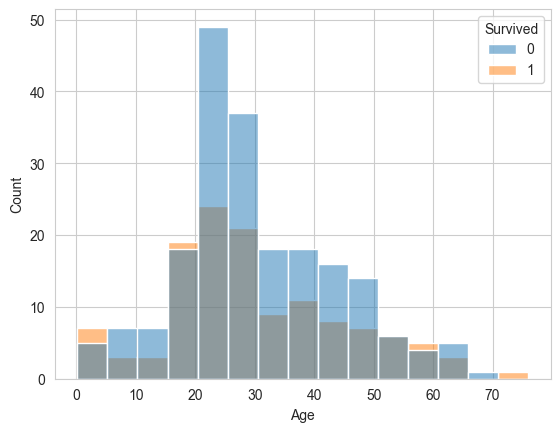

In [46]:
# 6. Create a histogram of ages grouped by survival status.
sns.set_style('whitegrid')
sns.histplot(data=total_servival_df, 
    x='Age',
    hue='Survived',
   )
